<a href="https://colab.research.google.com/github/hatimalhomid/multi_Lang_hotel_eng/blob/main/Multi_Lang_Hotel_search_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hotel and Arabic Data Search Interface

This project combines hotel and Arabic datasets for a search interface using a multilingual model. Results include similarity-based matches, metadata, and Google Maps links.

Datasets
1. Hotel Dataset:
   ds_en = load_dataset("traversaal-ai-hackathon/hotel_datasets")

2. Arabic Dataset:
   !kaggle datasets download -d asafarji/saudi-arabia-bookingcom-2021

Steps
1. Preprocess: Combine dataset rows into a `combined` column.
2. Generate Embeddings: Encode `combined` columns using `SentenceTransformer` and save as `.npy` files.
3. Run Interface: Use Gradio to launch the interactive search tool.

Features
- Search multilingual data with formatted results and metadata links.


Faiss Steps :
**raw text > into Embeddings [using an encoder] > save it in FAISS > raw text query > into an Embedding > Euclidean distance to retrieve the text closest to the query**

#Download the needed Library , Import them

In [ ]:
!pip install datasets faiss-gpu sentence_transformers gradio rank_bm25 openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1ac6850593d4191cf300263fe7a759722792e9940730fcdeccc96349cd487592
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
pip install eda


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from datasets import load_dataset
import gradio as gr
import pandas as pd
import numpy as np
import faiss
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
from rank_bm25 import BM25Okapi
import nltk
from nltk.tokenize import word_tokenize
import openai
import torch
import re
import numpy as np
from PIL import Image
import requests
from tqdm import tqdm
import pickle
from transformers import BartTokenizer, BartForConditionalGeneration
from sklearn.metrics.pairwise import cosine_similarity

#Load the data & Analyses the data




# New Section

#Load and preprocess Arabic data

In [ ]:
!pip install fpdf


from fpdf import FPDF

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=8a05cad82b636590328e3dabb89b0bc9c9efc255638b354ffa7e81015d8ae9ff
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:
!wget https://github.com/yannickcr/python-fpdf/blob/master/font/unifont/DejaVuSans.ttf


--2024-12-18 13:53:06--  https://github.com/yannickcr/python-fpdf/blob/master/font/unifont/DejaVuSans.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-12-18 13:53:06 ERROR 404: Not Found.



In [ ]:
class ChronologicalPDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.set_text_color(0, 51, 102)  # Dark Blue
        self.cell(0, 10, 'Curriculum Vitae', align='C', ln=True)
        self.ln(10)

    def section_title(self, title):
        self.set_font('Arial', 'B', 11)
        self.set_text_color(0, 102, 204)  # Blue
        self.cell(0, 10, title, ln=True)
        self.ln(2)

    def section_body(self, body):
        self.add_font('DejaVu', '', 'DejaVuSans.ttf', uni=True)
        self.set_font('DejaVu', '', 10)
        self.set_text_color(0, 0, 0)  # Black
        self.multi_cell(0, 8, body)
        self.ln(4)


# Creating a chronological-style PDF
chrono_pdf = ChronologicalPDF()
chrono_pdf.set_auto_page_break(auto=True, margin=15)
chrono_pdf.add_page()
# Title
chrono_pdf.set_font('Arial', 'B', 16)
chrono_pdf.set_text_color(0, 51, 102)  # Dark Blue
chrono_pdf.cell(0, 10, 'Hatim Alhomid', align='C', ln=True)
chrono_pdf.set_font('Arial', '', 12)
chrono_pdf.cell(0, 10, 'Senior Computer Science Student | Programming and AI Specialist', align='C', ln=True)
chrono_pdf.ln(10)

# Contact Info
chrono_pdf.set_font('Arial', '', 10)
chrono_pdf.cell(0, 10, 'Email: hatimalhomid@gmail.com | Phone: 0530520112 | Location: Saudi Arabia', align='C', ln=True)
chrono_pdf.ln(10)

# Chronological Structure
sections_chronological = {
    "Education": [
        "King Saud University (KSU) | Bachelor of Computer Science | 2021–2025",
        "LLM SDAIA Bootcamp | T5 Advanced LLM Bootcamp | July 2024 – September 2024",
        "SDAIA T5 Data Science Bootcamp | December 2022 – February 2023"
    ],
    "Experience": [
        "Volunteer | Saudi Food and Drug Authority (SFDA) | 3 months\n"
        "- Supported projects to enhance operational efficiency and contributed to technological solutions, "
        "such as chatbot development for pharmaceutical inquiries."
    ],
    "Projects": [
        "Hikaiah\n- Led the development of an AI-driven educational storytelling system for children.\n"
        "- Integrated image and audio generation to produce interactive videos, fostering curiosity and interactive learning.",
        "Multimodal Glaucoma Progression Detection\n- Built a system combining image and numerical data for glaucoma analysis, "
        "leveraging deep learning for robust results.",
        "Khulasa (خلاصه)\n- Created an AI tool using NLP to condense trends, news, and research papers into personalized daily digests.",
        "ColinAI\n- Designed a model to assist boxing referees by tracking metrics like punch counts and movements for real-time decisions.",
        "Hotel Search Engine\n- Developed a search engine combining BM25, FAISS, and RAG for precise results, with an enhanced interface for visuals.",
        "Pharmaceutical Chatbot\n- Built a chatbot for SFDA to provide accurate drug information, reducing response times from 4 minutes to 4 seconds."
    ],
    "Certifications": [
        "TensorFlow Developer Certificate",
        "SDAIA T5 Data Science",
        "KAUST AI Program",
        "Probability & Statistics for Machine Learning (Coursera)",
        "Python Basics (Coursera)",
        "Linear Algebra for Machine Learning (Coursera)",
        "Calculus for Machine Learning (Coursera)"
    ],
    "Skills": [
        "Technical Skills:\n"
        "- Programming Languages: Python, C++ (Basics), SQL\n"
        "- AI & ML: NLP, LLMs, CNNs, PyTorch, Scikit-learn, TensorFlow\n"
        "- Tools: Docker (Beginner), Keras\n"
        "- Data Analysis: Pandas, Numpy",
        "Soft Skills:\n"
        "- Problem-solving, Critical thinking, Teamwork, Research skills, Positivity"
    ]
}

# Add sections
for section, content in sections_chronological.items():
    chrono_pdf.section_title(section)
    chrono_pdf.section_body("\n".join(content))

# Save the final PDF
output_path_chrono = "Hatim_Alhomid_Chronological_CV.pdf"
chrono_pdf.output(output_path_chrono)

output_path_chrono


RuntimeError: TTF Font file not found: DejaVuSans.ttf

In [ ]:
!kaggle datasets download -d asafarji/saudi-arabia-bookingcom-2021

Dataset URL: https://www.kaggle.com/datasets/asafarji/saudi-arabia-bookingcom-2021
License(s): CC0-1.0
  0% 0.00/141k [00:00<?, ?B/s]
100% 141k/141k [00:00<00:00, 64.2MB/s]


In [ ]:
!unzip saudi-arabia-bookingcom-2021.zip

Archive:  saudi-arabia-bookingcom-2021.zip
  inflating: output.csv              
  inflating: reg1112.csv             


In [ ]:
df_ar = pd.read_csv('output.csv')

In [ ]:
df_ar_1 =  pd.read_csv('output.csv')

In [ ]:
# prompt: save it in 348Project folder in my drive

# Assuming you have mounted your Google Drive at '/content/drive'
import os

folder_path = '/content/drive/MyDrive/348Project'
os.makedirs(folder_path, exist_ok=True)

df_ar.to_csv(os.path.join(folder_path, 'df_ar.csv'), index=False)
df_ar_1.to_csv(os.path.join(folder_path, 'df_ar_1.csv'), index=False)

print(f"DataFrames saved to {folder_path}")


DataFrames saved to /content/drive/MyDrive/348Project


In [ ]:
df_ar = df_ar.drop_duplicates()

In [ ]:
df_ar['combined'] = df_ar.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


<ipython-input-16-017b37ca0b49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['combined'] = df_ar.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [ ]:
df_ar.head()

,Unnamed: 0,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,url,cm,combined
0,0,Marina Alsalaam,Dammam Show on map,SAR 140,"1 night, 2 adults",One-Bedroom Apartment,"2 beds\n(1 sofa bed, 1 large double)",6.5,Review score,177 reviews,/hotel/sa/marina-alsalaam.en-gb.html?aid=30414...,Entire apartment­ •­ 1 bedroom •­ 1 living roo...,0 Marina Alsalaam Dammam Show on map SAR 140 1...
1,1,Open ApartHotel,Dammam Show on map,SAR 180,"1 night, 2 adults",Deluxe Apartment,"2 beds\n(1 sofa bed, 1 large double)",5.5,Review score,731 reviews,/hotel/sa/ossuo-uossu-ossuo-uossu.en-gb.html?a...,Private apartment­ •­ 1 bedroom •­ 1 living ro...,1 Open ApartHotel Dammam Show on map SAR 180 1...
2,2,العييري للوحدات المفروشة الدمام 4,Dammam Show on map,SAR 248,"1 night, 2 adults",Double Room with Private Bathroom,"3 beds\n(2 singles, 1 double)",6.0,Review score,7 reviews,/hotel/sa/l-yyry-llwhdt-lmfrwsh-ldmm-4.en-gb.h...,"3 beds\n(2 singles, 1 double)",2 العييري للوحدات المفروشة الدمام 4 Dammam Sho...
3,3,العييري للوحات المفروشة الدمام 7,Dammam Show on map,SAR 250,"1 night, 2 adults",Double Room with Private Bathroom,"3 beds\n(2 singles, 1 double)",4.3,Review score,10 reviews,/hotel/sa/l-yyry-llwht-lmfrwsh-ldmm-7.en-gb.ht...,"3 beds\n(2 singles, 1 double)",3 العييري للوحات المفروشة الدمام 7 Dammam Show...
4,4,Aros Al Faisaliah Furnished Units,Dammam Show on map,SAR 224,"1 night, 2 adults",Studio Apartment,1 extra-large double bed,7.7,Good,264 reviews,/hotel/sa/aros-alfaisaliah-furnished-units.en-...,Entire apartment­ •­ 1 bedroom •­ 1 bathroom •...,4 Aros Al Faisaliah Furnished Units Dammam Sho...


In [ ]:
df_ar['combined'][1]

'1 Open ApartHotel Dammam Show on map SAR\xa0180 1 night, 2 adults Deluxe Apartment 2 beds\n(1 sofa bed,\xa01 large double) 5.5 Review score 731 reviews /hotel/sa/ossuo-uossu-ossuo-uossu.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaKQCiAEBmAEJuAEHyAEM2AEB6AEB-AEMiAIBqAIDuALCxJ31BcACAdgCAg&sid=41e029bb4b4a055ec48c44a45569d3cb&all_sr_blocks=73037514_191555574_0_0_0&checkin=2021-10-18&checkout=2021-10-19&dest_id=-3091069&dest_type=city&from_beach_non_key_ufi_sr=1&group_adults=2&group_children=0&hapos=27&highlighted_blocks=73037514_191555574_0_0_0&hpos=2&no_rooms=1&sr_order=popularity&sr_pri_blocks=73037514_191555574_0_0_0__18000&srepoch=1634545014&srpvid=a87e3a3b9dbc000b&ucfs=1&sig=v1ikOTkMOt&from=searchresults\n;highlight_room=#hotelTmpl Private apartment\xad •\xad 1 bedroom •\xad 1 living room •\xad 1 bathroom 2 beds\n(1 sofa bed,\xa01 large double)'

In [ ]:
from random import shuffle

ds_en = load_dataset("traversaal-ai-hackathon/hotel_datasets")

df_en = ds['train'].to_pandas()

csv_path = 'hotel_datasets.csv'
df.to_csv(csv_path, index=False )

print(f"The dataset has been saved to {csv_path}")


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

hotel_reviews_Istanbul.csv:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

hotel_reviews_San Francisco.csv:   0%|          | 0.00/1.53M [00:00<?, ?B/s]

hotel_reviews_london.csv:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

hotel_reviews_nyc.csv:   0%|          | 0.00/1.70M [00:00<?, ?B/s]

hotel_reviews_paris.csv:   0%|          | 0.00/1.76M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5997 [00:00<?, ? examples/s]

NameError: name 'ds' is not defined

In [ ]:
df_copy = df.copy()

In [ ]:

# # Generate a profile report
# profile = ProfileReport(df, title="Hotel Dataset Analysis", explorative=True)

# # To display the report in a Jupyter Notebook (if you're using one)
# profile.to_notebook_iframe()

# # To save the report as an HTML file
# profile.to_file("hotel_dataset_analysis_report.html")


In [ ]:

# # Generate a report
# eda.analysis(df)


# preprocess the images & embade images --> genrate caption ---> store it in list ---. combined in df

In [ ]:
df_copy_shuffled = df_copy.sample(frac=1).reset_index(drop=True)

df_copy_first_1000 = df_copy_shuffled.head(1000)



In [ ]:
df_copy_first_1000.hotel_name.value_counts()

,count
hotel_name,
Novotel Paris Les Halles,14
The Resident Covent Garden,13
Chancellor Hotel on Union Square,12
Conrad Istanbul Bosphorus,12
Arlo SoHo,11
...,...
"The Clermont, Victoria",3
Hotel du Printemps,3
Primero Hotel,3


In [ ]:
df_copy_first_1000.head()

,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country
0,Chancellor Hotel on Union Square,The BEST LOCATION at the BEST PRICE...The Chan...,One night stay for a concert!,"We stayed here Sunday night, June 11, 2023. We...",5.0,June 2023,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,5977,433 Powell Street,San Francisco,United States
1,Hampton Inn Manhattan / Times Square Central,"At Hampton Inn Manhattan/Time Square Central, ...",Karen is the best,Karen was AWESOME! I arrived on a whim and she...,5.0,November 2023,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,3645,220 West 41st St.,New York City,United States
2,The People - Paris Belleville,Les Piaules is a new hostel offering a bar and...,Great hostel experience!,This was my first real hostel experience and I...,5.0,June 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,639,59 Boulevard De Belleville,Paris,France
3,San Remo Hotel,We are a family-owned historic boutique pensio...,Perfect Venue for me and my Son to enjoy San F...,"Not sure, but it is possible I reviewed this f...",5.0,May 2019,https://www.tripadvisor.com/Hotel_Review-g6071...,https://dynamic-media-cdn.tripadvisor.com/medi...,$ (Based on Average Nightly Rates for a Standa...,4.0,1389,2237 Mason St,San Francisco,United States
4,Stanford Court San Francisco,Come experience the new Stanford Court! We are...,Can't beat the location and the service,"Wonderful service, and great location right on...",5.0,September 2023,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,1054,905 California Street Nob Hill,San Francisco,United States


Processing images:   6%|▌         | 61/1000 [00:02<00:46, 20.30image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  27%|██▋       | 271/1000 [00:12<00:29, 24.43image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  41%|████      | 409/1000 [00:17<00:33, 17.84image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  47%|████▋     | 469/1000 [00:20<00:21, 24.70image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images:  68%|██████▊   | 679/1000 [00:34<02:56,  1.82image/s]

Error processing https://dynamic-media-cdn.tripadvisor.com/media/photo-o/29/07/41/d6/san-francisco-interiors.jpg?w=500&h=-1&s=1: HTTPSConnectionPool(host='dynamic-media-cdn.tripadvisor.com', port=443): Read timed out. (read timeout=5)


Processing images:  68%|██████▊   | 681/1000 [00:39<05:16,  1.01image/s]

Error processing https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1a/87/b6/a2/pell-palace-hotel.jpg?w=500&h=-1&s=1: HTTPSConnectionPool(host='dynamic-media-cdn.tripadvisor.com', port=443): Read timed out. (read timeout=5)


Processing images:  68%|██████▊   | 684/1000 [00:44<06:25,  1.22s/image]

Error processing https://dynamic-media-cdn.tripadvisor.com/media/photo-o/0e/3c/2c/a3/ajwa-hotel-sultanahmet.jpg?w=500&h=-1&s=1: HTTPSConnectionPool(host='dynamic-media-cdn.tripadvisor.com', port=443): Read timed out. (read timeout=5)


Processing images:  69%|██████▉   | 688/1000 [00:49<05:48,  1.12s/image]

Error processing https://dynamic-media-cdn.tripadvisor.com/media/photo-o/28/95/21/07/exterior.jpg?w=500&h=400&s=1: HTTPSConnectionPool(host='dynamic-media-cdn.tripadvisor.com', port=443): Read timed out. (read timeout=5)


Processing images:  97%|█████████▋| 972/1000 [01:02<00:01, 21.35image/s]

Error processing https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg: 403 Client Error: Forbidden for url: https://media-cdn.tripadvisor.com/media/photo-s/2a/82/e7/e0/exterior.jpg


Processing images: 100%|██████████| 1000/1000 [01:03<00:00, 15.78image/s]


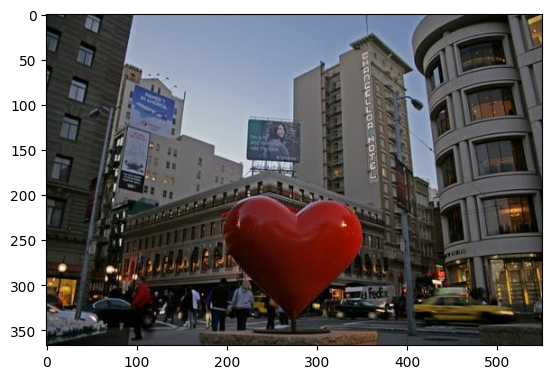

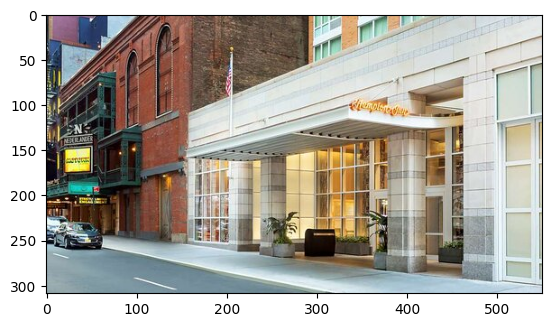

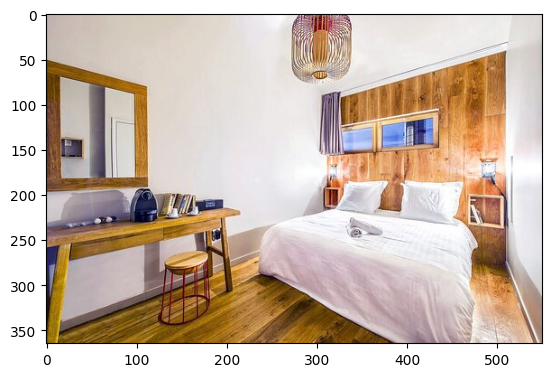

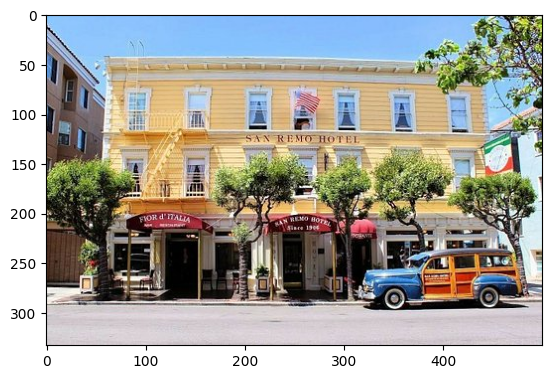

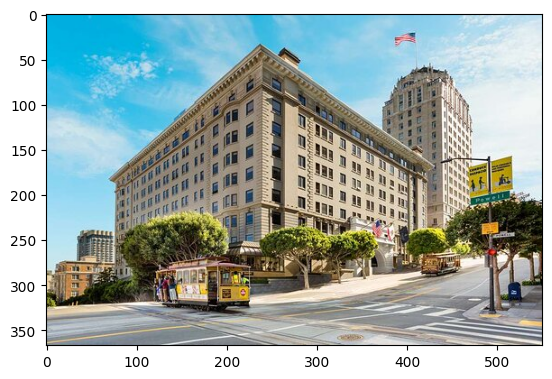

In [ ]:


processed_images = []

image_urls = df_copy_first_1000['hotel_image']

for url in tqdm(image_urls, desc="Processing images", unit="image"):
    try:
        response = requests.get(url, stream=True, timeout=5)
        response.raise_for_status()
        image = Image.open(response.raw)

        image_np = np.asarray(image)


        processed_images.append(image_np)

    except Exception as e:
        # If an image fails to load, skip it
        print(f"Error processing {url}: {e}")
        continue




Model to give us images caption

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
import torch
from tqdm import tqdm
from PIL import Image

# Ensure you have a GPU available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to GPU
model.to(device)

# List to store captions
captions = []

# Loop through processed images and generate captions
for image_np in tqdm(processed_images, desc="Generating captions", unit="image"):
    try:
        # Convert numpy array back to PIL Image
        image = Image.fromarray(image_np)

        # Preprocess the image
        inputs = processor(images=image, return_tensors="pt").to(device)  # Move inputs to GPU

        # Generate the caption
        outputs = model.generate(**inputs)
        caption = processor.decode(outputs[0], skip_special_tokens=True)

        # Append the caption to the list
        captions.append(caption)

    except Exception as e:
        # If there's an error, append a placeholder caption
        captions.append("No caption available")
        print(f"Error generating caption: {e}")


Generating captions:   0%|          | 0/991 [00:00<?, ?image/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Generating captions: 100%|██████████| 991/991 [03:38<00:00,  4.54image/s]


In [ ]:


if len(captions) < len(df_copy_first_1000):
    captions += ["No caption available"] * (len(df_copy_first_1000) - len(captions))

df_copy_first_1000['captions'] = captions



<ipython-input-15-a59b8dc86f83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_first_1000['captions'] = captions


In [ ]:
df_copy_first_1000['captions'].head(2)

,captions
0,a heart shaped sculpture is seen in the heart ...
1,the hotel at the corner of a street in downtown


Combined the important features with captions with cleaning

In [ ]:
df_copy_first_1000['combined'] = (
    df_copy_first_1000['captions'].fillna('') + " " +
    df_copy_first_1000['hotel_description'].fillna('') + " " +
    df_copy_first_1000['review_title'].fillna('') + " " +
    df_copy_first_1000['review_text'].fillna('') + " " +
    df_copy_first_1000['rate'].fillna('').astype(str) + " " +
    df_copy_first_1000['price_range'].fillna('') + " " +
    df_copy_first_1000['review_count'].fillna('').astype(str) + " " +
    df_copy_first_1000['locality'].fillna('')
)


<ipython-input-17-bcb74aac7034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_first_1000['combined'] = (


In [ ]:
df_copy_first_1000['combined'][1]


"the hotel at the corner of a street in downtown At Hampton Inn Manhattan/Time Square Central, you'll be in the heart of the vibrant Times Square/Broadway area of Manhattan, close to theaters, shopping and dining. Enjoy easy access to the Port Authority Bus Terminal, Penn Station and subway lines that will take you to other areas of Manhattan and the boroughs. Walk to Rockefeller Center, Herald Square, Jacob Javits Convention Center and Madison Square Garden. After a busy day at meetings or exploring Manhattan, retire to a comfortable guest room and relax in a clean and fresh Hampton bed®. Check emails using free WiFi at the spacious work space. Store your valuables in an in-room laptop-sized safe. Unwind watching your favorite programs on the 40-inch flat-screen TV. If you're bringing your family, request a high chair or crib for a more comfortable stay. Karen is the best Karen was AWESOME! I arrived on a whim and she greeted me in the lobby. Kind, courteous, beyond friendly and she i

# embade  comined column using (paraphrase-MiniLM-L6-v2) model

In [ ]:
model_en = SentenceTransformer('paraphrase-MiniLM-L6-v2')
model_ar = SentenceTransformer('sentence-transformers/multi-qa-MiniLM-L6-cos-v1')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# emnbde the combined column
embeddings = model.encode(df_copy_first_1000['combined'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
#encod arabic data
embeddings_ar = model_ar.encode(df_ar['combined'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

In [ ]:
# Save the embeddings in file
with open('/content/drive/MyDrive/348Project/embeddings_ar.pkl', 'wb') as file:
    pickle.dump(embeddings_ar, file)

In [ ]:
# check the saved file
with open('/content/drive/MyDrive/348Project/embeddings_ar.pkl', 'rb') as file:
    embeddings_ar = pickle.load(file)

#normlization and FAISS


In [ ]:
# Assuming 'embeddings' is your numpy array of embeddings
from sklearn.preprocessing import normalize
normalized_embeddings_ar = normalize(embeddings, norm='l2')
with open('/content/drive/MyDrive/348Project/normalized_embeddings_ar.pkl', 'wb') as f:
    pickle.dump(normalized_embeddings_ar, f)

In [ ]:
dimension = normalized_embeddings_ar.shape[1]

index = faiss.IndexFlatL2(dimension)

index.add(normalized_embeddings_ar)

In [ ]:
query_embedding = normalized_embeddings_ar[0].reshape(1, -1)

k=2
distances, indices = index.search(query_embedding, k)

In [ ]:
top_hotels = df_ar.iloc[indices[0]]

print(top_hotels[['name', 'combined']])


                                 name  \
0                     Marina Alsalaam   
25                 DALLA House Suites   
13      Al Eairy Apartments- Dammam 8   
48                   Sendan Residence   
569     Al Eairy Apartments- Dammam 8   
64   العييري للوحات المفروشة الدمام 7   
601     Al Eairy Apartments- Dammam 8   
5     العييري للوحات المفروشة الدمام3   
31              TIME Dammam Residence   
7        Khaleej ALez Furnished Units   

                                              combined  
0    0 Marina Alsalaam Dammam Show on map SAR 140 1...  
25   25 DALLA House Suites Dammam Show on map SAR 2...  
13   13 Al Eairy Apartments- Dammam 8 Dammam Show o...  
48   48 Sendan Residence Dammam Show on map SAR 270...  
569  11 Al Eairy Apartments- Dammam 8 Dammam Show o...  
64   64 العييري للوحات المفروشة الدمام 7 Dammam Sho...  
601  43 Al Eairy Apartments- Dammam 8 Dammam Show o...  
5    5 العييري للوحات المفروشة الدمام3 Dammam Show ...  
31   31 TIME Dammam Residence Damma

#TEST

In [ ]:
query_text = "Hotel near to King Fahad road"
query_embedding = model_ar.encode(query_text, convert_to_tensor=True)
query_embedding = query_embedding.cpu().numpy().reshape(1, -1)
query_embedding = normalize(query_embedding, norm='l2')

k = 10
distances, indices = index.search(query_embedding, k)

top_hotels = df_ar.iloc[indices[0]]
top_hotels[['name', 'location', 'price']]


,name,location,price
613,Grand Plaza Hotel-KAFD Riyadh,Riyadh Show on map,SAR 418
583,Grand Plaza Hotel-KAFD Riyadh,Riyadh Show on map,SAR 418
837,Al Muhaidb Down Town - King Fahd Road,Riyadh Show on map,SAR 250
707,Shahad Hotel,Riyadh Show on map,SAR 162
935,Al Waha Palace Hotel,"Al Olaya, Riyadh Show on map",SAR 413
720,Al Muhaidb Down Town - King Fahd Road,Riyadh Show on map,SAR 250
784,Radiha Hotel Suites,Al Ḩawīyah Show on map,SAR 180
764,Al Muhaidb Down Town - King Fahd Road,Riyadh Show on map,SAR 250
816,Shahad Hotel,Riyadh Show on map,SAR 162
195,Bhadur Resort Jeddah,Obhor Show on map,SAR 600


In [ ]:
top_hotels.columns

Index(['Unnamed: 0', 'name', 'location', 'price', 'price_for', 'room_type',
       'beds', 'rating', 'rating_title', 'number_of_ratings', 'url', 'cm',
       'combined'],
      dtype='object')

In [ ]:
df_copy_first_1000

,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country,captions,combined
0,Chancellor Hotel on Union Square,The BEST LOCATION at the BEST PRICE...The Chan...,One night stay for a concert!,"We stayed here Sunday night, June 11, 2023. We...",5.0,June 2023,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,5977,433 Powell Street,San Francisco,United States,a heart shaped sculpture is seen in the heart ...,a heart shaped sculpture is seen in the heart ...
1,Hampton Inn Manhattan / Times Square Central,"At Hampton Inn Manhattan/Time Square Central, ...",Karen is the best,Karen was AWESOME! I arrived on a whim and she...,5.0,November 2023,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,3645,220 West 41st St.,New York City,United States,the hotel at the corner of a street in downtown,the hotel at the corner of a street in downtow...
2,The People - Paris Belleville,Les Piaules is a new hostel offering a bar and...,Great hostel experience!,This was my first real hostel experience and I...,5.0,June 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.5,639,59 Boulevard De Belleville,Paris,France,a bedroom with a bed and a desk,a bedroom with a bed and a desk Les Piaules is...
3,San Remo Hotel,We are a family-owned historic boutique pensio...,Perfect Venue for me and my Son to enjoy San F...,"Not sure, but it is possible I reviewed this f...",5.0,May 2019,https://www.tripadvisor.com/Hotel_Review-g6071...,https://dynamic-media-cdn.tripadvisor.com/medi...,$ (Based on Average Nightly Rates for a Standa...,4.0,1389,2237 Mason St,San Francisco,United States,a yellow building with a car parked in front,a yellow building with a car parked in front W...
4,Stanford Court San Francisco,Come experience the new Stanford Court! We are...,Can't beat the location and the service,"Wonderful service, and great location right on...",5.0,September 2023,https://www.tripadvisor.com/Hotel_Review-g6071...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,1054,905 California Street Nob Hill,San Francisco,United States,the historic hotel on the corner of the street,the historic hotel on the corner of the street...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Novotel London Blackfriars,"In line with local government restrictions, ou...",Everything on your doorstep,"Location is great 5 minutes to the tube, surro...",4.0,July 2023,https://www.tripadvisor.com/Hotel_Review-g1863...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,3515,46 Blackfriars Road,London,United Kingdom,No caption available,No caption available In line with local govern...
996,Hotel La Comtesse,None,It was a great experience. Will go back!,It was a great experience. Very professional s...,5.0,October 2023,https://www.tripadvisor.com/Hotel_Review-g1871...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,4.5,962,29 Avenue De Tourville,Paris,France,No caption available,No caption available It was a great experienc...
997,The Tower Hotel,The Tower Hotel is nestled between the River T...,AVOID! Cleaner on the streets.,Firstly I want to say do NOT book the hotel. I...,1.0,January 2024,https://www.tripadvisor.com/Hotel_Review-g1863...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,4.0,13530,St Katharine's Way,London,United Kingdom,No caption available,No caption available The Tower Hotel is nestle...
998,Hyatt Centric Fisherman's Wharf San Francisco,Locat

In [ ]:
#

#summrization model BART

##Deploy in Graedio

In [ ]:
df_ar = pd.read_csv('/content/drive/MyDrive/348Project/df_ar_1.csv')
df_hotels = pd.read_csv('/content/drive/MyDrive/348Project/hotel_dataset_processed.csv')

In [ ]:
df_hotels.columns

Index(['hotel_name', 'hotel_description', 'review_title', 'review_text',
       'rate', 'tripdate', 'hotel_url', 'hotel_image', 'price_range',
       'rating_value', 'review_count', 'street_address', 'locality', 'country',
       'captions', 'combined'],
      dtype='object')

In [ ]:
df_ar.columns

Index(['Unnamed: 0', 'name', 'location', 'price', 'price_for', 'room_type',
       'beds', 'rating', 'rating_title', 'number_of_ratings', 'url', 'cm'],
      dtype='object')

In [ ]:
df_ar.head()

,Unnamed: 0,name,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,url,cm,index
0,0,Marina Alsalaam,Dammam Show on map,SAR 140,"1 night, 2 adults",One-Bedroom Apartment,"2 beds\n(1 sofa bed, 1 large double)",6.5,Review score,177 reviews,/hotel/sa/marina-alsalaam.en-gb.html?aid=30414...,Entire apartment­ •­ 1 bedroom •­ 1 living roo...,0
1,1,Open ApartHotel,Dammam Show on map,SAR 180,"1 night, 2 adults",Deluxe Apartment,"2 beds\n(1 sofa bed, 1 large double)",5.5,Review score,731 reviews,/hotel/sa/ossuo-uossu-ossuo-uossu.en-gb.html?a...,Private apartment­ •­ 1 bedroom •­ 1 living ro...,1
2,2,العييري للوحدات المفروشة الدمام 4,Dammam Show on map,SAR 248,"1 night, 2 adults",Double Room with Private Bathroom,"3 beds\n(2 singles, 1 double)",6.0,Review score,7 reviews,/hotel/sa/l-yyry-llwhdt-lmfrwsh-ldmm-4.en-gb.h...,"3 beds\n(2 singles, 1 double)",2
3,3,العييري للوحات المفروشة الدمام 7,Dammam Show on map,SAR 250,"1 night, 2 adults",Double Room with Private Bathroom,"3 beds\n(2 singles, 1 double)",4.3,Review score,10 reviews,/hotel/sa/l-yyry-llwht-lmfrwsh-ldmm-7.en-gb.ht...,"3 beds\n(2 singles, 1 double)",3
4,4,Aros Al Faisaliah Furnished Units,Dammam Show on map,SAR 224,"1 night, 2 adults",Studio Apartment,1 extra-large double bed,7.7,Good,264 reviews,/hotel/sa/aros-alfaisaliah-furnished-units.en-...,Entire apartment­ •­ 1 bedroom •­ 1 bathroom •...,4


In [ ]:
def search_in_combined(query_text, model_hotels, model_ar, k=5):
    query_embedding_hotels = model_hotels.encode(query_text, convert_to_tensor=True).cpu().numpy().reshape(1, -1)
    query_embedding_ar = model_ar.encode(query_text, convert_to_tensor=True).cpu().numpy().reshape(1, -1)

    similarities_hotels = cosine_similarity(query_embedding_hotels, embeddings_hotels).flatten()
    similarities_ar = cosine_similarity(query_embedding_ar, embeddings_ar).flatten()

    top_indices_hotels = np.argsort(similarities_hotels)[::-1][:k]
    top_indices_ar = np.argsort(similarities_ar)[::-1][:k]

    top_hotels = df_hotels.iloc[top_indices_hotels].copy()
    top_ar = df_ar.iloc[top_indices_ar].copy()

    top_hotels['similarity'] = similarities_hotels[top_indices_hotels]
    top_ar['similarity'] = similarities_ar[top_indices_ar]

    combined_top_results = pd.concat([top_hotels, top_ar], ignore_index=True)

    combined_top_results = combined_top_results.sort_values(by='similarity', ascending=False)

    return combined_top_results.head(k)



,index,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,...,location,price,price_for,room_type,beds,rating,rating_title,number_of_ratings,url,cm
0,981.0,Moxy NYC East Village,"Designed for the modern traveler, our lifestyl...",Perfect for families with teens!,This is the perfect hotel for families! The bu...,5.0,January 2024,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,Tempo by Hilton New York Times Square,NaN,TEMPO is just the right tempo!,Had an absolute BLAST! Hotel is located prime...,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,625.0,"The New Yorker, A Wyndham Hotel",The New Yorker Hotel is one of the most popula...,Excellent location and service,Just recently visited New York and my 2nd time...,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,946.0,Moxy NYC Times Square,A spirited alternative to the typical hotel ex...,Exceptional service!!,From the moment we arrived we were lucky to ha...,5.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,675.0,"The New Yorker, A Wyndham Hotel",The New Yorker Hotel is one of the most popula...,"Great location, but what a shame - poor servic...",Great location but that's where it ended. ...,1.0,December 2023,https://www.tripadvisor.com/Hotel_Review-g6076...,https://media-cdn.tripadvisor.com/media/photo-...,$$ (Based on Average Nightly Rates for a Stand...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import gradio as gr

def format_results(results):
    formatted_results = []

    for _, row in results.iterrows():
        if not pd.isna(row.get('hotel_name', '')):
            result = (
                f"**Hotel Name**: {row.get('hotel_name', 'N/A')}\n"
                f"**Description**: {row.get('hotel_description', 'N/A')}\n"
                f"**Review Title**: {row.get('review_title', 'N/A')}\n"
                f"**Review Text**: {row.get('review_text', 'N/A')}\n"
                f"**Rating**: {row.get('rate', 'N/A')}\n"
                f"**Trip Date**: {row.get('tripdate', 'N/A')}\n"
                f"**Price Range**: {row.get('price_range', 'N/A')}\n"
                f"**Location**: {row.get('location', 'N/A')}\n"
                f"**URL**: [Link]({row.get('hotel_url', 'N/A')})\n"
                f"**Image**: ![Image]({row.get('hotel_image', 'N/A')})\n"
            )
        else:
            result = (
                f"**Name**: {row.get('name', 'N/A')}\n"
                f"**Location**: {row.get('location', 'N/A')}\n"
                f"**Price**: {row.get('price', 'N/A')}\n"
                f"**Price For**: {row.get('price_for', 'N/A')}\n"
                f"**Room Type**: {row.get('room_type', 'N/A')}\n"
                f"**Beds**: {row.get('beds', 'N/A')}\n"
                f"**Rating**: {row.get('rating', 'N/A')}\n"
                f"**Rating Title**: {row.get('rating_title', 'N/A')}\n"
                f"**Number of Ratings**: {row.get('number_of_ratings', 'N/A')}\n"
                f"**URL**: [Link]({row.get('url', 'N/A')})\n"
                f"**Additional Info**: {row.get('cm', 'N/A')}\n"
            )
        formatted_results.append(result)

    return "\n\n".join(formatted_results)


def search_interface(query_text):
    results = search_in_combined(query_text, model_en, model_ar, k=5)
    return format_results(results)

# Define Gradio interface
iface = gr.Interface(
    fn=search_interface,
    inputs=gr.Textbox(label="Enter your search query"),
    outputs=gr.Textbox(label="Search Results", lines=10),
    title="Hotel and Arabic Data Search",
    description="Enter a query to search for hotels or Arabic data. The results will show the top matches based on similarity.",
    examples=["Riyadh", "Deluxe Room"]
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://aedfb27e2d2b2b7146.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#Clean RSaudi hotels Code

# Old attemps

In [ ]:
df_ar = pd.read_csv('/content/drive/MyDrive/348Project/df_ar_1.csv')
df_hotels = pd.read_csv('/content/drive/MyDrive/348Project/hotel_dataset_processed.csv')
embeddings_hotels = np.load('/content/drive/MyDrive/348Project/normalized_embeddings.pkl', allow_pickle=True)
embeddings_ar = np.load('/content/drive/MyDrive/348Project/normalized_embeddings_ar.pkl', allow_pickle=True)

In [ ]:
def search_in_combined(query_text, model_hotels, model_ar, k=5):
    query_embedding_hotels = model_hotels.encode(query_text, convert_to_tensor=True).cpu().numpy().reshape(1, -1)
    query_embedding_ar = model_ar.encode(query_text, convert_to_tensor=True).cpu().numpy().reshape(1, -1)

    similarities_hotels = cosine_similarity(query_embedding_hotels, embeddings_hotels).flatten()
    similarities_ar = cosine_similarity(query_embedding_ar, embeddings_ar).flatten()

    top_indices_hotels = np.argsort(similarities_hotels)[::-1][:k]
    top_indices_ar = np.argsort(similarities_ar)[::-1][:k]

    top_hotels = df_hotels.iloc[top_indices_hotels].copy()
    top_ar = df_ar.iloc[top_indices_ar].copy()

    top_hotels['similarity'] = similarities_hotels[top_indices_hotels]
    top_ar['similarity'] = similarities_ar[top_indices_ar]

    combined_top_results = pd.concat([top_hotels, top_ar], ignore_index=True)

    combined_top_results = combined_top_results.sort_values(by='similarity', ascending=False)

    combined_top_results['google_maps_url'] = combined_top_results.apply(
        lambda row: f"https://www.google.com/maps/search/?api=1&query={row['hotel_name'].replace(' ', '+')}"
        if 'hotel_name' in row and not pd.isna(row['hotel_name']) else '',
        axis=1
    )

    return combined_top_results.head(k)


In [ ]:
def format_results(results):
    formatted_results = []

    for _, row in results.iterrows():
        if not pd.isna(row.get('hotel_name', '')):
            google_maps_url = f"https://www.google.com/maps/search/?api=1&query={row.get('hotel_name', 'N/A').replace(' ', '+')}"

            result = (
                f"<b>Hotel Name</b>: {row.get('hotel_name', 'N/A')}<br>"
                                f"<b></b><br>"
                f"<b>Description</b>: {row.get('hotel_description', 'N/A')}<br>"
                                f"<b></b><br>"
                f"<b>Review Title</b>: {row.get('review_title', 'N/A')}<br>"
                f"<b>Review Text</b>: {row.get('review_text', 'N/A')}<br>"
                                f"<b></b><br>"
                f"<b>Rating</b>: {row.get('rate', 'N/A')}<br>"
                f"<b>Trip Date</b>: {row.get('tripdate', 'N/A')}<br>"
                f"<b>Price Range</b>: {row.get('price_range', 'N/A')}<br>"
                f"<b>Location</b>: {row.get('locality', 'N/A')} , {row.get('country', 'N/A')}<br>"
                f"<b></b><br>"
                f"<b>Hotel Website URL</b>: <a href='{row.get('hotel_url', 'N/A')}' target='_blank'>Link</a><br>"
                f"<b>Google Maps</b>: <a href='{google_maps_url}' target='_blank'>View on Maps</a><br>"
                f"<b>Image</b>: <img src='{row.get('hotel_image', 'N/A')}' width='200' /><br>"
            )
        else:
            google_maps_url = f"https://www.google.com/maps/search/?api=1&query={row.get('name', 'N/A').replace(' ', '+')}"

            result = (
                f"<b>Name</b>: {row.get('name', 'N/A')}<br>"
                f"<b>Location</b>: {row.get('location', 'N/A')}<br>"
                f"<b>Price</b>: {row.get('price', 'N/A')}<br>"
                f"<b>Price For</b>: {row.get('price_for', 'N/A')}<br>"
                f"<b>Room Type</b>: {row.get('room_type', 'N/A')}<br>"
                f"<b>Beds</b>: {row.get('beds', 'N/A')}<br>"
                f"<b>Rating</b>: {row.get('rating', 'N/A')}<br>"
                f"<b>Rating Title</b>: {row.get('rating_title', 'N/A')}<br>"
                f"<b>Google Maps</b>: <a href='{google_maps_url}' target='_blank'>View on Maps</a><br>"
                f"<b>Number of Ratings</b>: {row.get('number_of_ratings', 'N/A')}<br>"
                f"<b>Hotel Website URL</b>: <a href='{row.get('url', 'N/A')}' target='_blank'>Link</a><br>"
                f"<b>Additional Info</b>: {row.get('cm', 'N/A')}<br>"
            )
        formatted_results.append(result)

    return "<br><br>".join(formatted_results)


In [ ]:
def search_interface(query_text):
    results = search_in_combined(query_text, model_en, model_ar, 7)
    return format_results(results)

iface = gr.Interface(
    fn=search_interface,
    inputs=gr.Textbox(label="Enter your search query"),
    outputs=gr.HTML(label="Search Results"),
    title="Hotel and Arabic Data Search",
    description="Enter a query to search for hotels or Arabic data. The results will show the top matches based on similarity and provide a Google Maps URL for hotel locations.",
    examples=["Riyadh", "Deluxe Room"]
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b1b52523b75942da30.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# hotel search enging v2 , Final & clean code

In [ ]:
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
df_ar = pd.read_csv('/content/drive/MyDrive/348Project/df_ar_1.csv')
df_hotels = pd.read_csv('/content/drive/MyDrive/348Project/hotel_dataset_processed.csv')


In [ ]:
df_ar['combined'] = df_ar.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_ar['combined']

,combined
0,0 Marina Alsalaam Dammam Show on map SAR 140 1...
1,1 Open ApartHotel Dammam Show on map SAR 180 1...
2,2 العييري للوحدات المفروشة الدمام 4 Dammam Sho...
3,3 العييري للوحات المفروشة الدمام 7 Dammam Show...
4,4 Aros Al Faisaliah Furnished Units Dammam Sho...
...,...
1437,"45 Al Aqeeq Madinah Hotel Central Madinah, Al ..."
1438,"46 Al Qibla Hotel Central Madinah, Al Madinah ..."
1439,"47 Dar Al Naem Hotel Central Madinah, Al Madin..."
1440,"48 Nozol Royal Inn Hotel Central Madinah, Al M..."


In [ ]:
embeddings_hotels = model.encode(df_hotels['combined'].tolist(), convert_to_tensor=False)

np.save('/content/drive/MyDrive/348Project/normalized_embeddings_hotels_multilingual.npy', embeddings_hotels)


In [ ]:
embeddings_ar = model.encode(df_ar['combined'].tolist(), convert_to_tensor=False)

np.save('/content/drive/MyDrive/348Project/normalized_embeddings_ar_multilingual.npy', embeddings_ar)


In [ ]:
embeddings_hotels = np.load('/content/drive/MyDrive/348Project/normalized_embeddings_hotels_multilingual.npy', allow_pickle=True)
embeddings_ar = np.load('/content/drive/MyDrive/348Project/normalized_embeddings_ar_multilingual.npy', allow_pickle=True)


In [ ]:
def search_in_combined(query_text, model, k=5):
    query_embedding = model.encode(query_text, convert_to_tensor=True).cpu().numpy().reshape(1, -1)

    similarities_hotels = cosine_similarity(query_embedding, embeddings_hotels).flatten()
    similarities_ar = cosine_similarity(query_embedding, embeddings_ar).flatten()

    top_indices_hotels = np.argsort(similarities_hotels)[::-1][:k]
    top_indices_ar = np.argsort(similarities_ar)[::-1][:k]

    top_hotels = df_hotels.iloc[top_indices_hotels].copy()
    top_ar = df_ar.iloc[top_indices_ar].copy()

    top_hotels['similarity'] = similarities_hotels[top_indices_hotels]
    top_ar['similarity'] = similarities_ar[top_indices_ar]

    combined_top_results = pd.concat([top_hotels, top_ar], ignore_index=True)
    combined_top_results = combined_top_results.sort_values(by='similarity', ascending=False)

    combined_top_results['google_maps_url'] = combined_top_results.apply(
        lambda row: f"https://www.google.com/maps/search/?api=1&query={row['hotel_name'].replace(' ', '+')}"
        if 'hotel_name' in row and not pd.isna(row['hotel_name']) else '',
        axis=1
    )

    return combined_top_results.head(k)


In [ ]:
def format_results(results):
    formatted_results = []

    for _, row in results.iterrows():
        if not pd.isna(row.get('hotel_name', '')):
            google_maps_url = f"https://www.google.com/maps/search/?api=1&query={row.get('hotel_name', 'N/A').replace(' ', '+')}"

            result = (
                f"<b>Hotel Name</b>: {row.get('hotel_name', 'N/A')}<br>"
                                f"<b></b><br>"
                f"<b>Description</b>: {row.get('hotel_description', 'N/A')}<br>"
                                f"<b></b><br>"
                f"<b>Review Title</b>: {row.get('review_title', 'N/A')}<br>"
                f"<b>Review Text</b>: {row.get('review_text', 'N/A')}<br>"
                                f"<b></b><br>"
                f"<b>Rating</b>: {row.get('rate', 'N/A')}<br>"
                f"<b>Trip Date</b>: {row.get('tripdate', 'N/A')}<br>"
                f"<b>Price Range</b>: {row.get('price_range', 'N/A')}<br>"
                f"<b>Location</b>: {row.get('locality', 'N/A')} , {row.get('country', 'N/A')}<br>"
                f"<b></b><br>"
                f"<b>Hotel Website URL</b>: <a href='{row.get('hotel_url', 'N/A')}' target='_blank'>Link</a><br>"
                f"<b>Google Maps</b>: <a href='{google_maps_url}' target='_blank'>View on Maps</a><br>"
                f"<b>Image</b>: <img src='{row.get('hotel_image', 'N/A')}' width='200' /><br>"
            )
        else:
            google_maps_url = f"https://www.google.com/maps/search/?api=1&query={row.get('name', 'N/A').replace(' ', '+')}"

            result = (
                f"<b>Name</b>: {row.get('name', 'N/A')}<br>"
                f"<b>Location</b>: {row.get('location', 'N/A')}<br>"
                f"<b>Price</b>: {row.get('price', 'N/A')}<br>"
                f"<b>Price For</b>: {row.get('price_for', 'N/A')}<br>"
                f"<b>Room Type</b>: {row.get('room_type', 'N/A')}<br>"
                f"<b>Beds</b>: {row.get('beds', 'N/A')}<br>"
                f"<b>Rating</b>: {row.get('rating', 'N/A')}<br>"
                f"<b>Rating Title</b>: {row.get('rating_title', 'N/A')}<br>"
                f"<b>Google Maps</b>: <a href='{google_maps_url}' target='_blank'>View on Maps</a><br>"
                f"<b>Number of Ratings</b>: {row.get('number_of_ratings', 'N/A')}<br>"
                f"<b>Hotel Website URL</b>: <a href='{row.get('url', 'N/A')}' target='_blank'>Link</a><br>"
                f"<b>Additional Info</b>: {row.get('cm', 'N/A')}<br>"
            )
        formatted_results.append(result)

    return "<br><br>".join(formatted_results)


In [ ]:
def search_interface(query_text):
    results = search_in_combined(query_text, model, k=5)
    return format_results(results)


iface = gr.Interface(
    fn=search_interface,
    inputs=gr.Textbox(label="Enter your search query"),
    outputs=gr.HTML(label="Search Results"),
    title="Hotel and Arabic Data Search",
    description="Enter a query to search for hotels or Arabic data. The results will show the top matches based on similarity and provide a Google Maps URL for hotel locations.",
    examples=["Riyadh", "Deluxe Room"]
)

iface.launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1fbabe727fc144e8b1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
